In [ ]:
# Instalación de la biblioteca necesaria
!pip install google-cloud-bigquery

In [ ]:

# Importación de bibliotecas
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Autenticación
auth.authenticate_user()

# Conexión a BigQuery
project_id = 'ultimate-realm-388922'
client = bigquery.Client(project=project_id)


In [ ]:

# Consulta a BigQuery
query1 = """
        SELECT
        passenger_count,
        COUNT(*) AS frequency

        FROM
            `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
            WHERE
  passenger_count IS NOT NULL
GROUP BY
  passenger_count
ORDER BY
  passenger_count


        """

pasajeros = client.query(query1).to_dataframe()

# Visualización de los primeros registros
pasajeros
# Análisis Exploratorio de Datos (EDA)



,passenger_count,frequency
0,1,24302971
1,2,4563703
2,3,1131287
3,4,621910
4,5,402955
5,6,267275
6,7,67
7,8,162
8,9,46


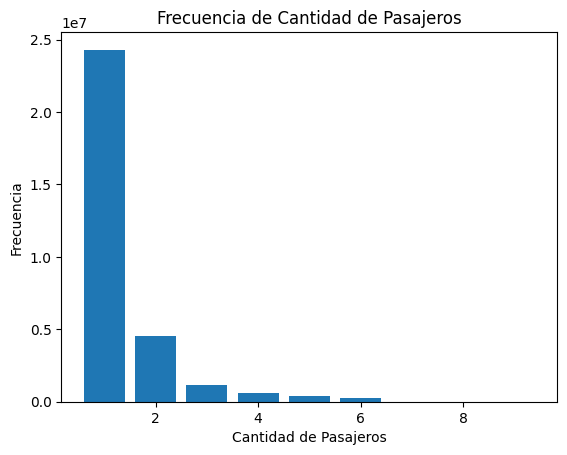

In [ ]:
# Crear un histograma
plt.bar(pasajeros['passenger_count'], pasajeros['frequency'])
plt.title('Frecuencia de Cantidad de Pasajeros')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

El gráfico de barra muestra que en la gran mayoria de los viajes hay un solo pasajero. Esto se tendrá en cuenta para elegir el auto ideal. Tener en cuenta que un taxi anda 200 millas por día

#### Análisis exploratorio de datos (EDA) para comparar los 5 autos eléctricos para uso de taxi en Nueva York autorizados.

In [ ]:

# Consulta a BigQuery
query = """
SELECT
    *
FROM
    `ultimate-realm-388922.taxis_nyc.ElectricCarData_Clean`
WHERE
    Model IN ('Model 3 Long Range Dual Motor', 'IONIQ Electric', 'Model Y Long Range Dual Motor', 'e-Niro 64 kWh', 'Mustang Mach-E ER RWD')
ORDER BY
    PriceEuro


        """

df_EV_taxi = client.query(query).to_dataframe()

# Visualización de los primeros registros
df_EV_taxi.head(50)

# Análisis Exploratorio de Datos (EDA)


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Hyundai,IONIQ Electric,9.7,165,250,153,210,Yes,FWD,Type 2 CCS,Liftback,C,5,34459
1,Kia,e-Niro 64 kWh,7.8,167,370,173,350,Yes,FWD,Type 2 CCS,SUV,C,5,38105
2,Ford,Mustang Mach-E ER RWD,7.0,180,450,200,430,Yes,RWD,Type 2 CCS,SUV,D,5,54475
3,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
4,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620


La eficiencia esta medida en whatt por kilómetros, esto quiere decir que mientras menos whatt consuma, es más eficiente.
Estos cinco autos eléctricos son los que acepta la TLC de NYC para taxis amarillos. Por ello el análisis se concentra solamente en estos modelos.

#### Exploración Inicial:

In [ ]:

# Verifica si hay valores nulos en el DataFrame
valores_nulos = df_EV_taxi.isnull().sum()

# Muestra la cantidad de valores nulos por columna
print(valores_nulos)

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


No ha valores nulos

#### Estadísticas Descriptivas:

In [ ]:
# Calcula estadísticas descriptivas para columnas numéricas
estadisticas_descriptivas = df_EV_taxi.describe()

# Muestra las estadísticas descriptivas
print(estadisticas_descriptivas)

       AccelSec  TopSpeed_KmH   Range_Km  Efficiency_WhKm     Seats  \
count  5.000000           5.0        5.0              5.0       5.0   
mean   6.840000         192.4      389.0            171.6       5.4   
std    2.071956     30.835045  84.291162        17.798876  0.894427   
min    4.600000         165.0      250.0            153.0       5.0   
25%    5.100000         167.0      370.0            161.0       5.0   
50%    7.000000         180.0      425.0            171.0       5.0   
75%    7.800000         217.0      450.0            173.0       5.0   
max    9.700000         233.0      450.0            200.0       7.0   

          PriceEuro  
count           5.0  
mean        48227.8  
std    11086.824013  
min         34459.0  
25%         38105.0  
50%         54475.0  
75%         55480.0  
max         58620.0  


#### Visualizaciones:

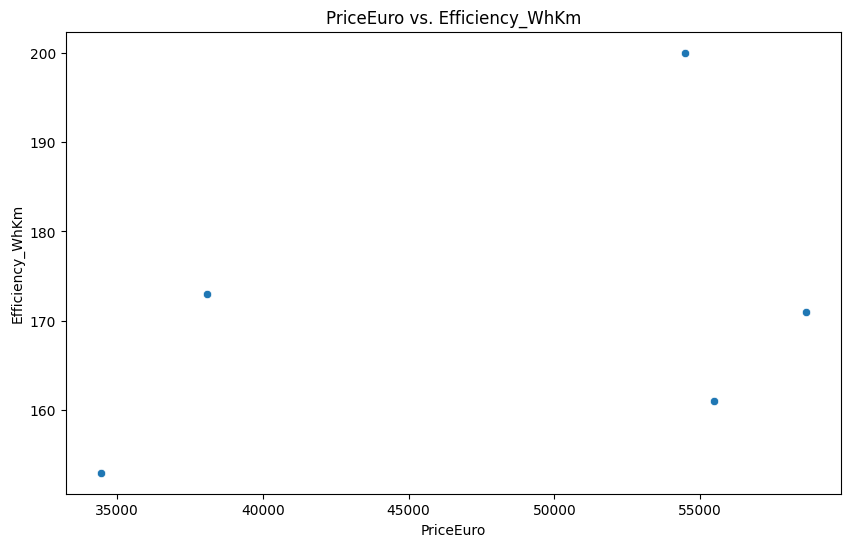

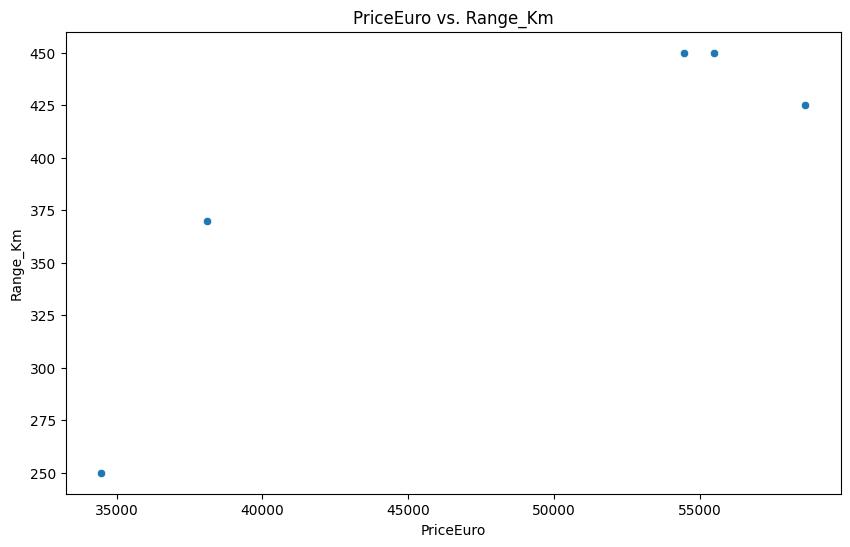

In [ ]:
# Gráfico de dispersión: PriceEuro vs. Efficiency_WhKm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PriceEuro', y='Efficiency_WhKm', data=df_EV_taxi)
plt.title('PriceEuro vs. Efficiency_WhKm')
plt.xlabel('PriceEuro')
plt.ylabel('Efficiency_WhKm')
plt.show()

# Gráfico de dispersión: PriceEuro vs. Range_Km
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PriceEuro', y='Range_Km', data=df_EV_taxi)
plt.title('PriceEuro vs. Range_Km')
plt.xlabel('PriceEuro')
plt.ylabel('Range_Km')
plt.show()

Existe una correlación entre el precio del vehículo y la autonomía es decir los km que puede recorrer con una bateria llena. Mientras más caro el vehículo más km puede recorrer. Por otra parte en terminos de eficiencia de Wh por km y el precio del auto, no existe tan correlación lineal.

#### Análisis de Correlación

<ipython-input-7-a9a61cb9db52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_EV_taxi.corr()


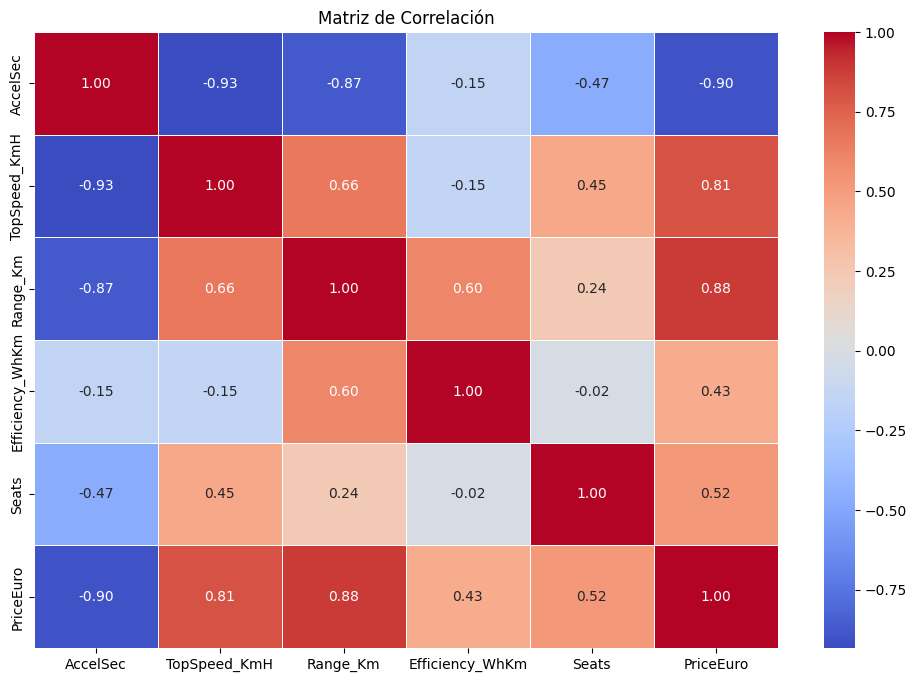

In [ ]:
# Calcula la matriz de correlación
matriz_correlacion = df_EV_taxi.corr()

# Visualiza la matriz de correlación mediante un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Hay una fuerte correlación entre el precio del vehículo con lo que puede aportar entermnos de autonomía, aceleración y máxima velocidad. Tambien hay correlación positiva entre la autonomía y la eficiencia.

#### Comparaciones entre Modelos

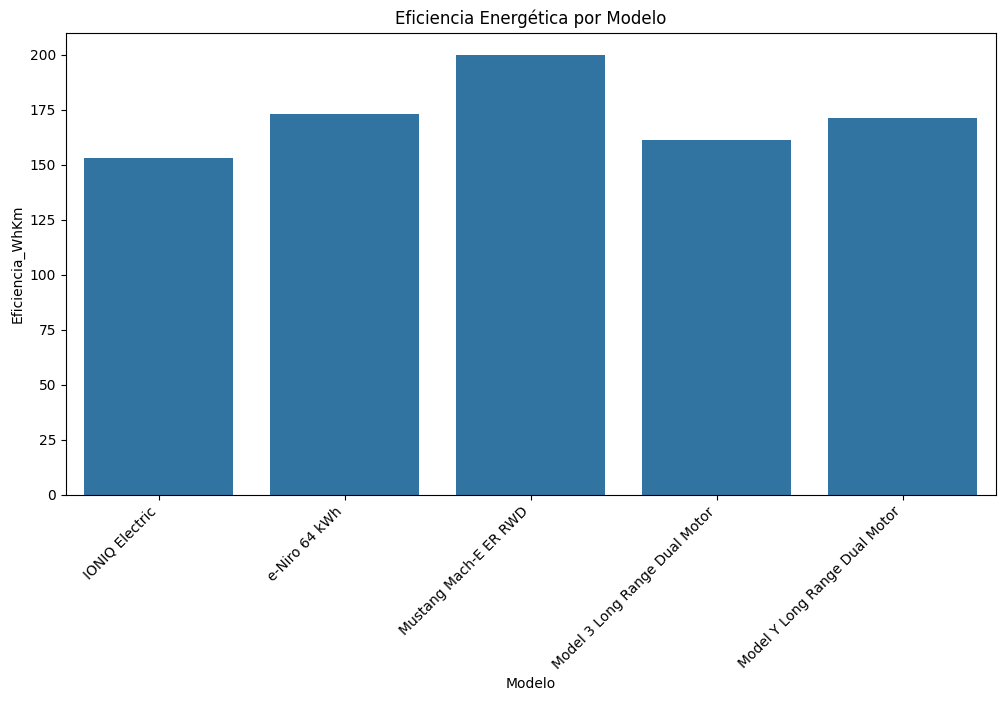

In [ ]:
# Gráfico de barras para la eficiencia energética
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Efficiency_WhKm', data=df_EV_taxi)
plt.title('Eficiencia Energética por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Eficiencia_WhKm')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

En el gráfico de barras anterior se puede ver cual es la eficiencia de Wh/km para cada modelo de vehículo. Tener en cuenta que un vehículo con relación menor de Wh/km, podrá recorrer un kilómetro con menos Whatts, es decir consume menos por km.


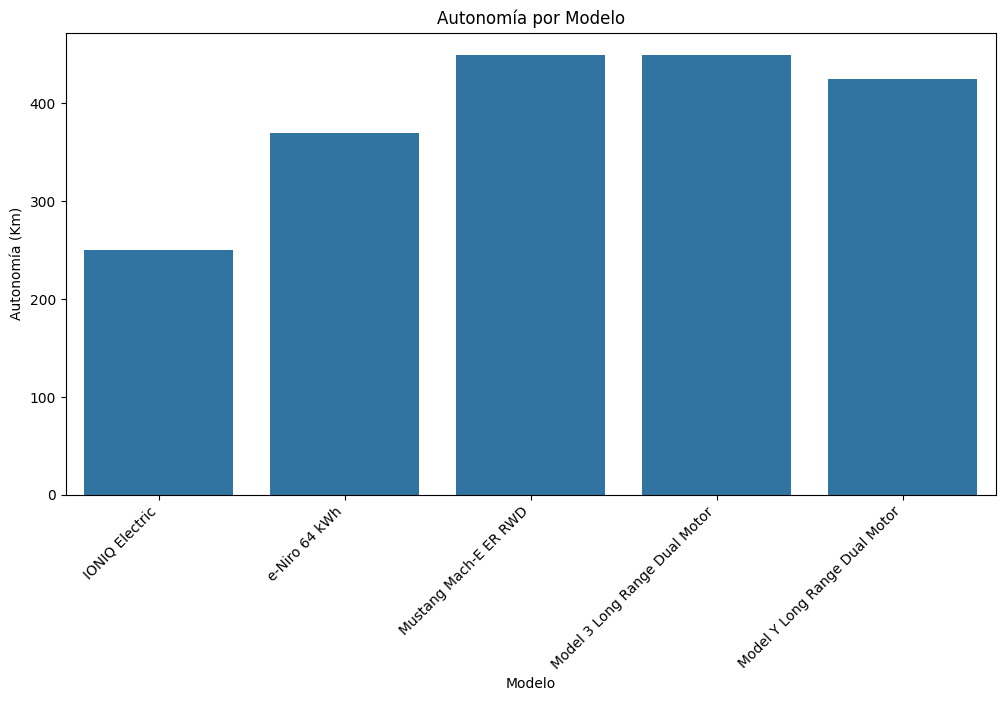

In [ ]:
# Gráfico de barras para la autonomía
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Range_Km', data=df_EV_taxi)
plt.title('Autonomía por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Autonomía (Km)')
plt.xticks(rotation=45, ha='right')
plt.show()


Este gráfico indica la cantidad de km que puede recorrer un auto con una bateria llena. Por ejemplo el Model 3 (Tesla) y el Mustang (Ford) pueden recorrer 450 km con una batería llena. Este dato es interesante, teniendo en cueta que un taxi en promedio recorre 300 km diarios.

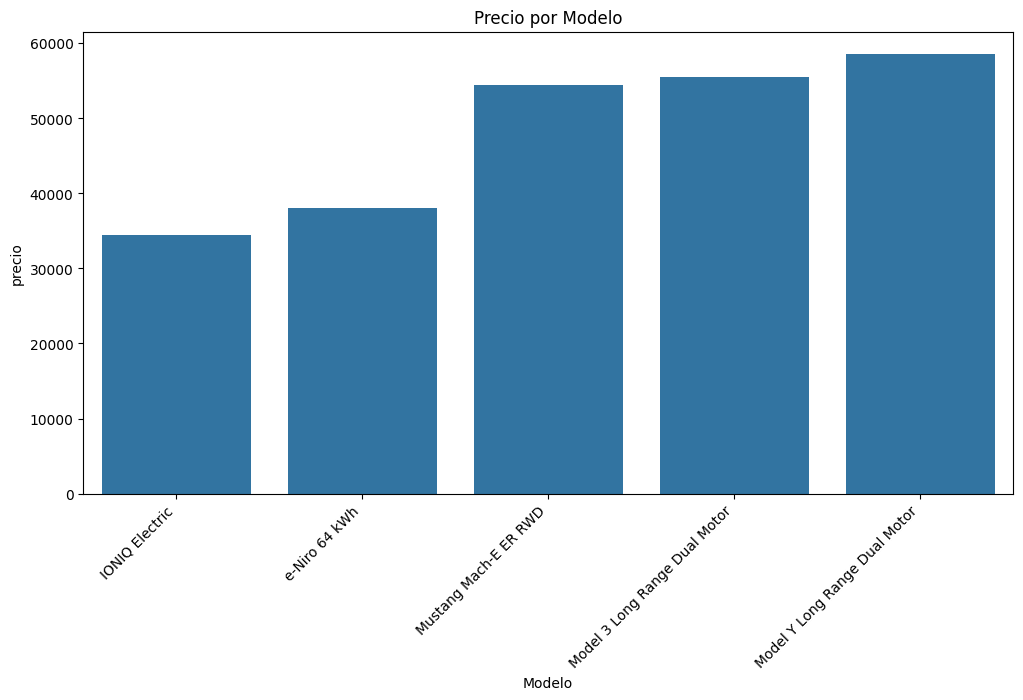

In [ ]:
# Gráfico de barras para la Precio'
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='PriceEuro', data=df_EV_taxi)
plt.title('Precio por Modelo')
plt.xlabel('Modelo')
plt.ylabel('precio')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Conclusiones


Considerando la autonomía media 389 y los requerimientos estándares de un taxi en la nyc por dia (300km), creemos que el auto a elegir debería tener una autonomía mayor a 320 km con una sola carga. El caso de Hyundai IONIQ Electric, esta por debajo de este valor.


Por otro lado la eficiencia es un factor clave para el ahorro en un auto de trabajo. La media para este parámetro es de 171, por lo que los autos elegidos no deberían desviarse de ese valor. El caso de Ford Mustang es un valor relativamente ineficiente ya que es de 200Wh por km.

Finalmente observando el precio del vehículo, con una media de 48.000 euro, encontramos que Kia e-Niro 64 kWh, se encuentra 10.000 euros por debajo de esta media y aún así cumple con los requisitos de autonomía y eficiencia. Otra alternativa es el Model 3 de Tesla, que si bien el precio es bastante superior, tiene mejor autonomía y eficiencia. En este caso, hay que tener en cuenta que los Teslas son los autos que menos se deprecian del mercado. Se puede esperar que al cabo de 5 años el valor residual del auto sea 48.7% según el informe de de "forococheselectricos.com"